# Titanic Dataset:

**Objectives:** 
- Load and clean the dataset, perform univariate and bivariate analysis, and visualize survival trends. 

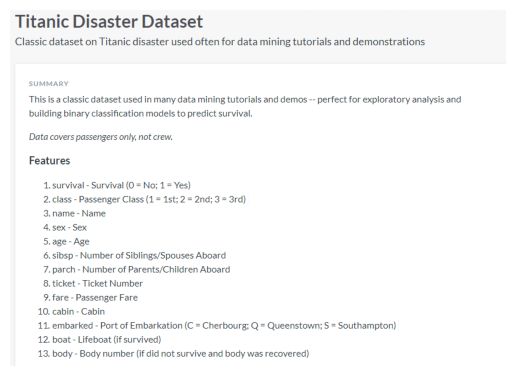

--------------------

## Import Libraries:

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

-------------------------

## Load Dataset:

In [89]:
df=pd.read_excel('C:/Users/Admin/Desktop/Bistartx Intership/Month-1/titanic3.xls')
df.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1291,3,0,"Willer, Mr. Aaron (""Abi Weller"")",male,NaN,0,0,3410,8.7125,NaN,S,NaN,NaN,NaN
294,1,0,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C,NaN,NaN,"Haverford, PA"
104,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,4,NaN,"Brookline, MA"
184,1,0,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,NaN,NaN,"Chicago, IL"
594,2,0,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,NaN,NaN,"Guernsey, England / Edgewood, RI"


In [90]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


---------------------

## Errors Handling

**Observations**
1. Convert the Age column data type to int after handling missing values.
2. Round values in the Fare column to two decimal places for consistency.
3. Handle missing values appropriately to maintain data integrity.
4. Remove uninformative columns that do not contribute to the analysis.

**Handle missing values appropriately to maintain data integrity.**

### Dealing with missing values/ Duplicate values / Outliers

<Figure size 800x600 with 0 Axes>

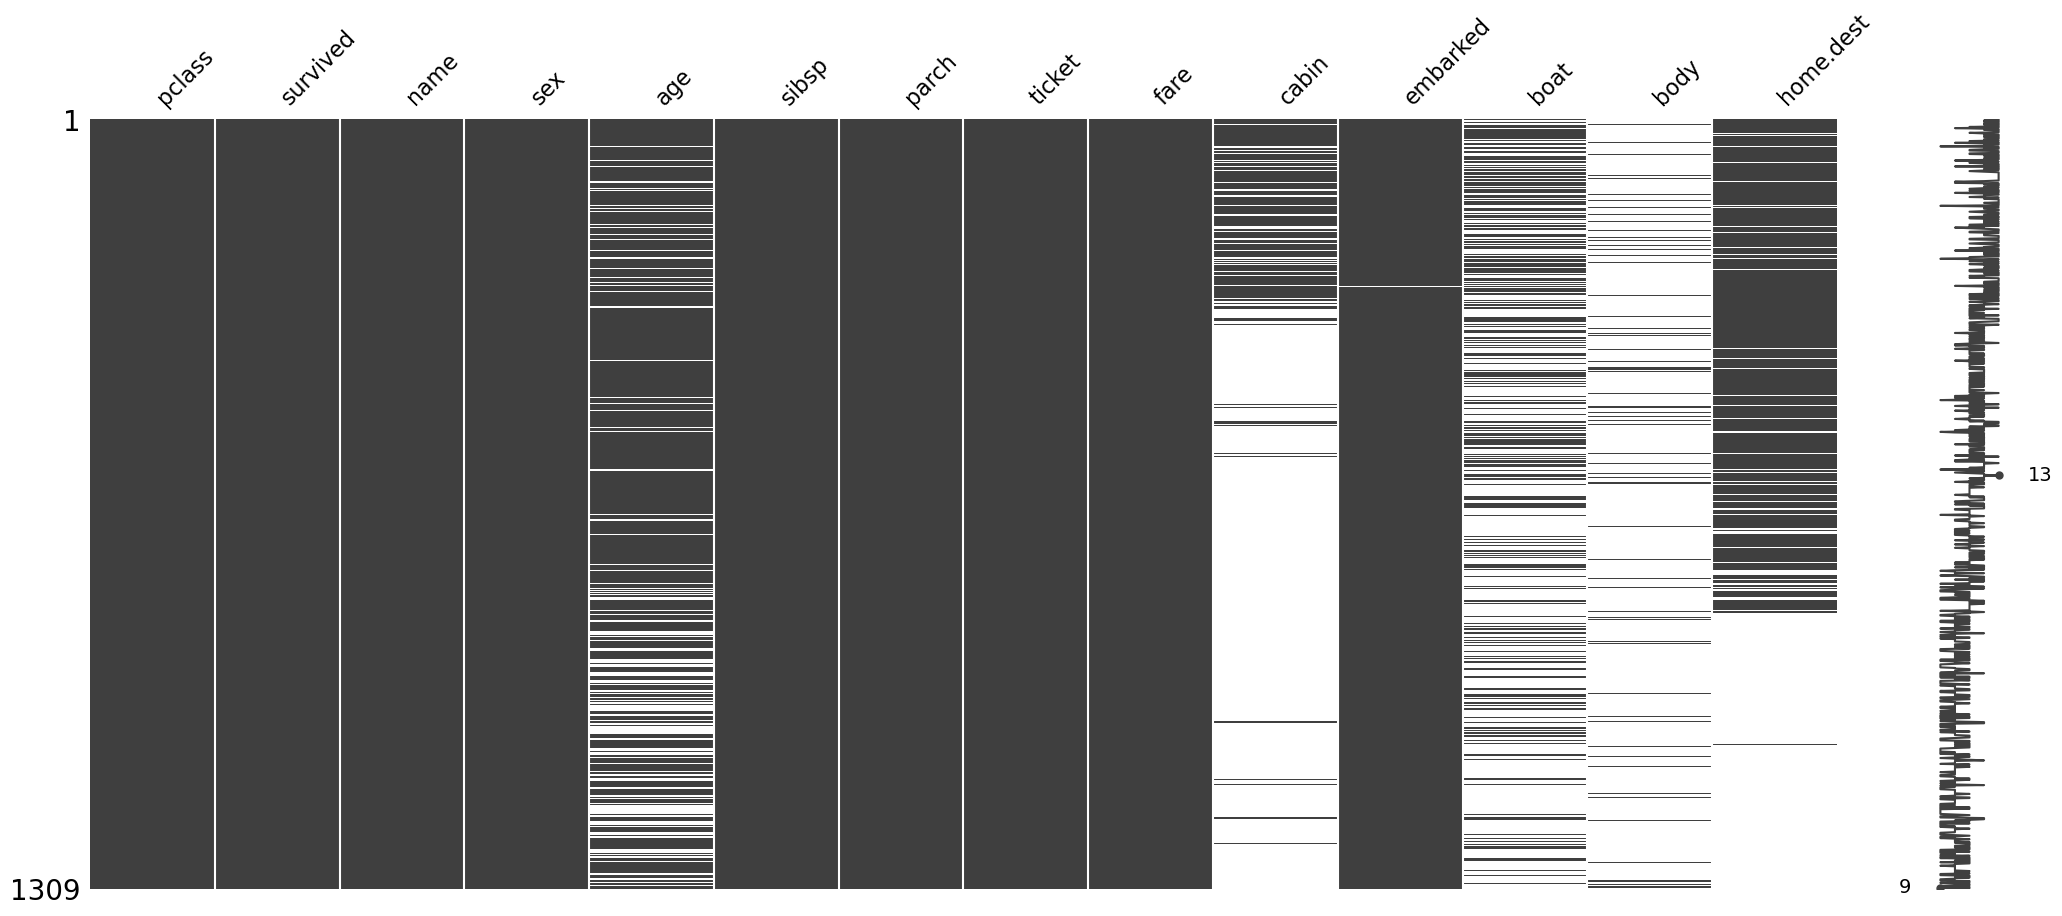

In [91]:
plt.figure(figsize=(8,6))
msno.matrix(df)
plt.show()

- `Age` column has values MCAR.
- `cabin`,`boat`,`body`,`home.dest` columns values not MCAR.


In [92]:
percentage_missing = ((df.isnull().sum() / len(df)) * 100).round(2)
print(percentage_missing)

pclass        0.00
survived      0.00
name          0.00
sex           0.00
age          20.09
sibsp         0.00
parch         0.00
ticket        0.00
fare          0.08
cabin        77.46
embarked      0.15
boat         62.87
body         90.76
home.dest    43.09
dtype: float64


**Observations**
1. `cabin`,`boat`,`body` and `home.dest` are to much missing data so we remove them in dataset, also these column don't give any important information.
2. Fill missing values of `age` `fare` and `embarked`.

**Remove uninformative columns that do not contribute to the analysis**

In [93]:
df.drop(columns=['cabin','boat','body','home.dest'], axis=1, inplace=True)

In [94]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


**Before filling missing values, we first analyze the column's distribution to determine the most appropriate imputation method**

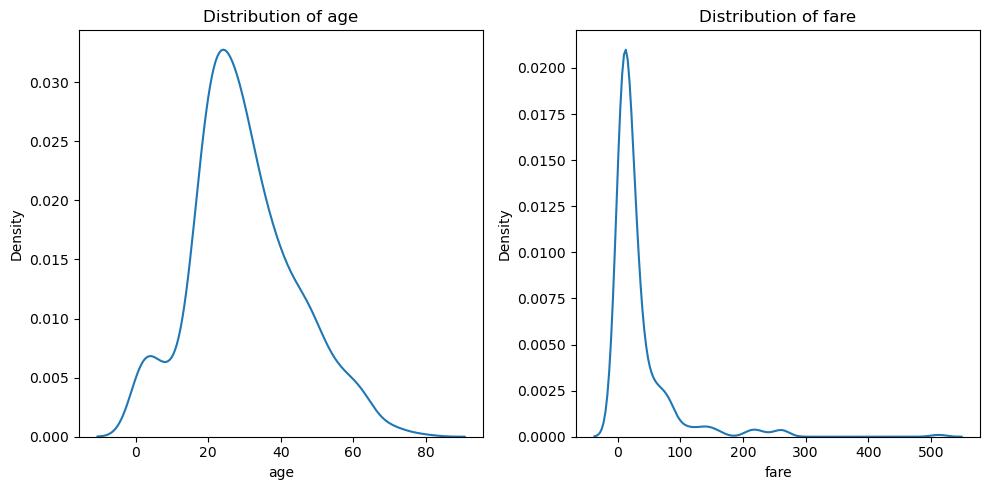

In [95]:
plt.figure(figsize=(10,5))
cols = ['age', 'fare']

for i , col in enumerate(cols):
    plt.subplot(1, 2, i + 1)
    sns.kdeplot(df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


**Median is best method for that**

In [96]:
cols = ['age', 'fare']

for col in cols:
    df[col] = df[col].fillna(df[col].median())

In [97]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [98]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

**Round values in the Fare column to two decimal places for consistency**

In [99]:
# Round fare value into 2 decimals

df['fare'] = df['fare'].round(2)
df['fare'].head()

0    211.34
1    151.55
2    151.55
3    151.55
4    151.55
Name: fare, dtype: float64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1309 non-null   float64
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


**Issues related to errors and missing values have been resolved successfully.**

**Check Duplicates in data**

In [101]:
df[df.duplicated()].sum()

pclass        0
survived      0
name          0
sex           0
age         0.0
sibsp         0
parch         0
ticket        0
fare        0.0
embarked      0
dtype: object

**No Duplicates in data**

**Checking Outliers**

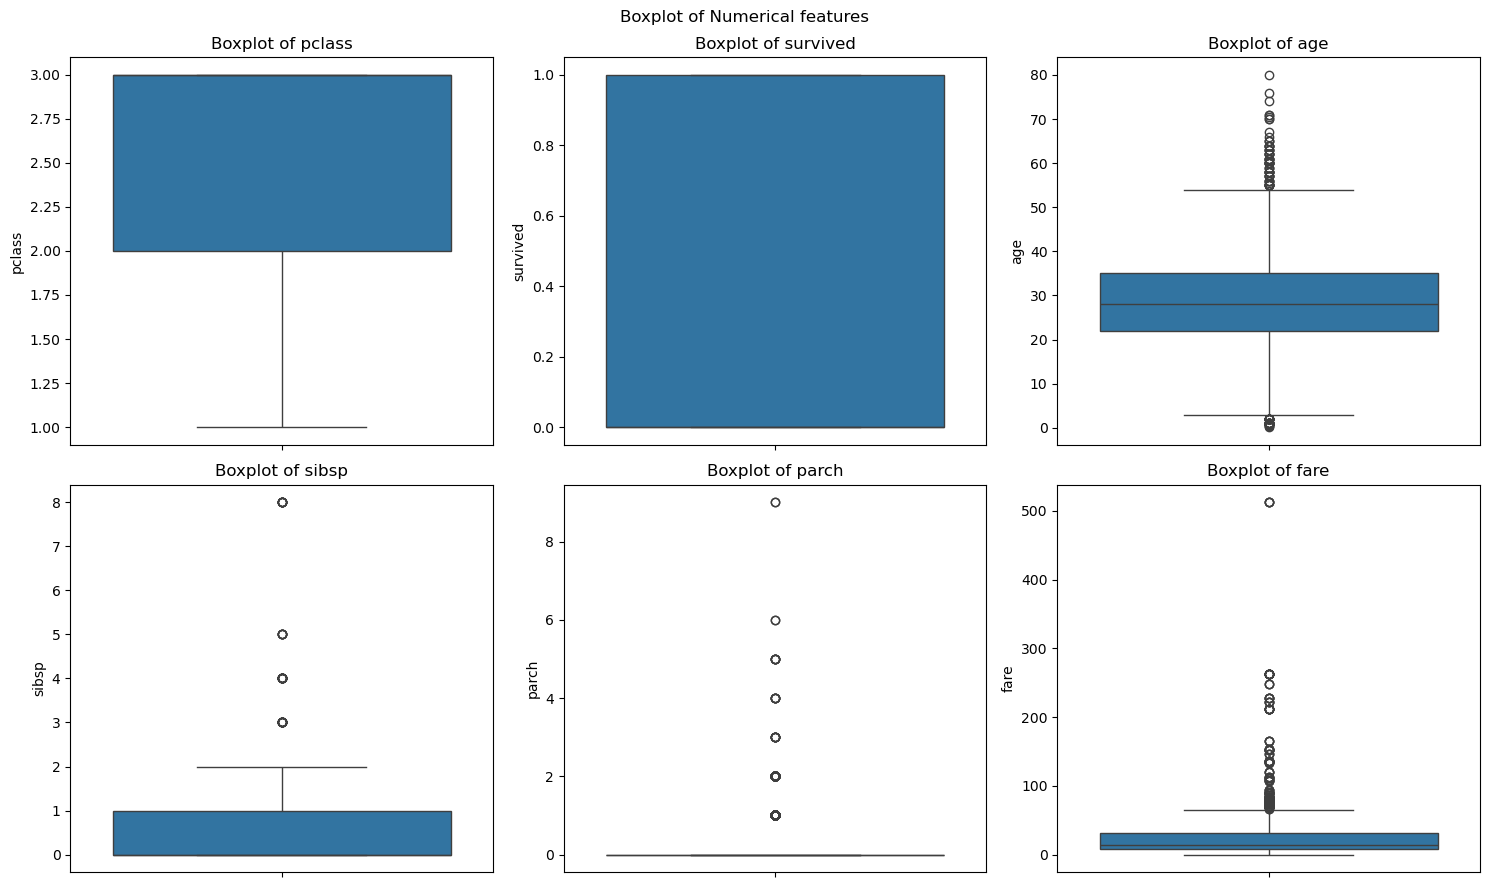

In [102]:
plt.figure(figsize=(15,9))

for i , col in enumerate(df.select_dtypes(include='number')):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.suptitle('Boxplot of Numerical features')
plt.tight_layout()
plt.show()

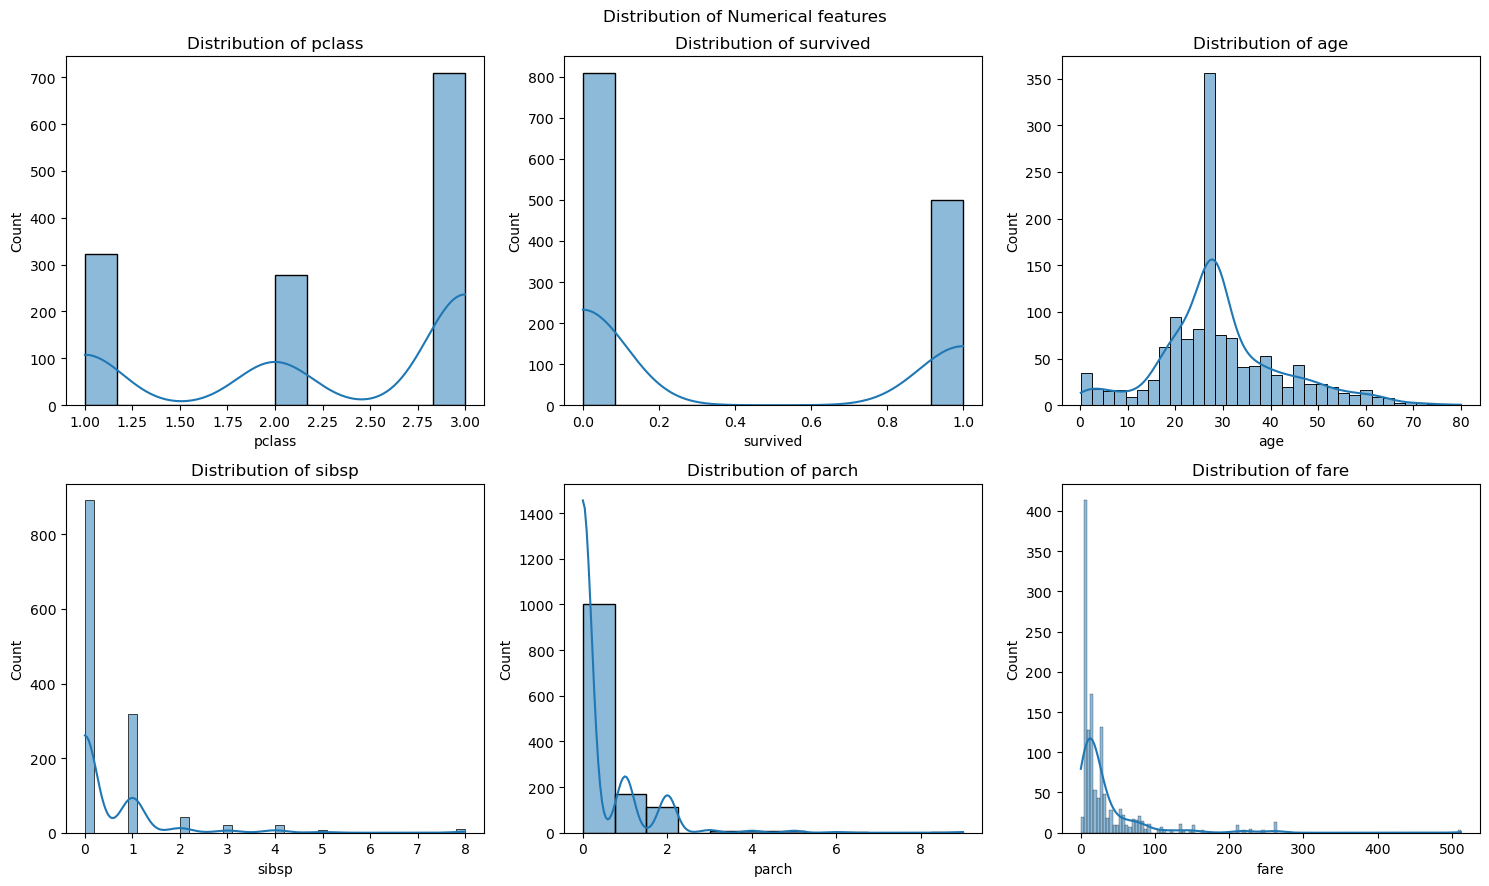

In [125]:
plt.figure(figsize=(15,9))

for i , col in enumerate(df.select_dtypes(include='number')):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.suptitle('Distribution of Numerical features')
plt.tight_layout()
plt.show()

**Observations**

**`AGE`**
- Since most passengers were adults (ages 20–40), the IQR method considers young children (<5) and elderly passengers (>60) as outliers because they differ from the majority.
    - Titanic had many children and elderly passengers, particularly in third class (families) and first class (wealthy elderly travelers).
  
**`SIBSP`**
- Since most passengers traveled alone (SibSp = 0) or with one family member (SibSp = 1), the method considers large families (SibSp ≥ 3) as outliers because they deviate from the majority.
    - Titanic carried many large families, especially in third class, where families immigrating to America often traveled together. 

------------------

## Exploratory Data Analysis:

### Univariate Analysis